In [5]:
import os
import numpy as np
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

print(os.listdir("../HeartFailure"))
np.random.seed(10)

['Untitled.ipynb', 'heart.csv', '.ipynb_checkpoints']


In [7]:
data = pd.read_csv("../HeartFailure/heart.csv")
print(data.head(3))

print(data.dtypes)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [8]:
Y = data.target.values
X = data.drop(['target'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Train Features Size:", X_train.shape)
print("Test Features Size:", X_test.shape)
print("Train Labels Size:", Y_train.shape)
print("Test Labels Size:", Y_test.shape)

Train Features Size: (242, 13)
Test Features Size: (61, 13)
Train Labels Size: (242,)
Test Labels Size: (61,)


In [9]:
def NN_model(learning_rate):
    model = Sequential()
    model.add(Dense(32, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [10]:
learning_rate = 0.01
model = NN_model(learning_rate)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=16, verbose=2)

Epoch 1/100
16/16 - 0s - loss: 0.9545 - accuracy: 0.4545 - val_loss: 0.7539 - val_accuracy: 0.5410
Epoch 2/100
16/16 - 0s - loss: 0.7195 - accuracy: 0.5744 - val_loss: 0.6655 - val_accuracy: 0.5902
Epoch 3/100
16/16 - 0s - loss: 0.6436 - accuracy: 0.5992 - val_loss: 0.6086 - val_accuracy: 0.7869
Epoch 4/100
16/16 - 0s - loss: 0.6160 - accuracy: 0.6694 - val_loss: 0.6718 - val_accuracy: 0.5410
Epoch 5/100
16/16 - 0s - loss: 0.6348 - accuracy: 0.6281 - val_loss: 0.5337 - val_accuracy: 0.7869
Epoch 6/100
16/16 - 0s - loss: 0.5935 - accuracy: 0.6818 - val_loss: 0.5467 - val_accuracy: 0.7541
Epoch 7/100
16/16 - 0s - loss: 0.6090 - accuracy: 0.6570 - val_loss: 0.5134 - val_accuracy: 0.7541
Epoch 8/100
16/16 - 0s - loss: 0.5674 - accuracy: 0.6983 - val_loss: 0.4906 - val_accuracy: 0.8361
Epoch 9/100
16/16 - 0s - loss: 0.5872 - accuracy: 0.6694 - val_loss: 0.4964 - val_accuracy: 0.7869
Epoch 10/100
16/16 - 0s - loss: 0.5656 - accuracy: 0.6860 - val_loss: 0.4886 - val_accuracy: 0.8033
Epoch 11/

16/16 - 0s - loss: 0.3989 - accuracy: 0.8388 - val_loss: 0.4168 - val_accuracy: 0.8197
Epoch 84/100
16/16 - 0s - loss: 0.3922 - accuracy: 0.8182 - val_loss: 0.4143 - val_accuracy: 0.8197
Epoch 85/100
16/16 - 0s - loss: 0.3899 - accuracy: 0.8182 - val_loss: 0.3985 - val_accuracy: 0.8361
Epoch 86/100
16/16 - 0s - loss: 0.3731 - accuracy: 0.8347 - val_loss: 0.3552 - val_accuracy: 0.8852
Epoch 87/100
16/16 - 0s - loss: 0.3758 - accuracy: 0.8099 - val_loss: 0.3779 - val_accuracy: 0.8525
Epoch 88/100
16/16 - 0s - loss: 0.3750 - accuracy: 0.8471 - val_loss: 0.4038 - val_accuracy: 0.8361
Epoch 89/100
16/16 - 0s - loss: 0.3783 - accuracy: 0.8471 - val_loss: 0.3621 - val_accuracy: 0.8852
Epoch 90/100
16/16 - 0s - loss: 0.4176 - accuracy: 0.7893 - val_loss: 0.4255 - val_accuracy: 0.8197
Epoch 91/100
16/16 - 0s - loss: 0.3744 - accuracy: 0.8512 - val_loss: 0.3966 - val_accuracy: 0.8689
Epoch 92/100
16/16 - 0s - loss: 0.3757 - accuracy: 0.8388 - val_loss: 0.4454 - val_accuracy: 0.8033
Epoch 93/100


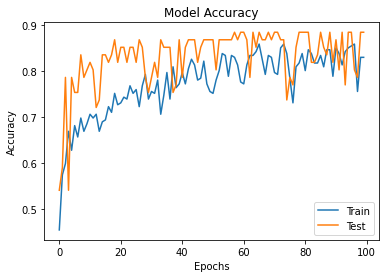

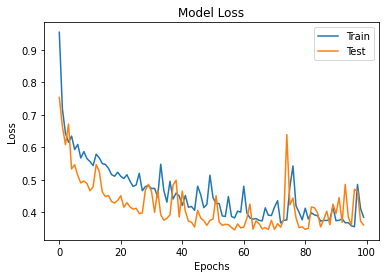

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

In [14]:
predictions = np.argmax(model.predict(X_test), axis=1)
model_accuracy = accuracy_score(Y_test, predictions)*100
print("Model Accracy:", model_accuracy,"%")
print(classification_report(Y_test, predictions))

Model Accracy: 88.52459016393442 %
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

